# Preparación de los datos

## Dependencias

In [1]:
import pandas as pd
import os
import datetime
import missingno as msno
import zipfile
from zipfile import ZipFile

## Lectura de los datos

Se leerán los datos de ambas métricas, para ambas localizaciones y para todas las especies. Estos datos se incluirán en un solo dataframe

In [2]:
root = 'Material Sara Dennis' # Ruta raíz de los datos
metricas = ['EVI', 'NDVI']
localizaciones = ['DENTRO', 'FUERA']

In [3]:
# Dataframe en donde se incluirán todos los datos
df = pd.DataFrame()
x = 0
# Se iteran las métricas
for metrica in metricas:
    # Se iteran los lugares
    for localizacion in localizaciones:
        # Se crea el path de la carpeta desde donde se intentarán leer 
        # los archivos de datos
        path = f'{root}/{metrica}/{metrica}-{localizacion}'
        # Se itera la carpeta y se leen los conjuntos de datos
        for f in os.listdir(path):
            # Se revisa si el objeto actual es un archivo (para no intentar)
            # leer carpetas
            path_dataset = f'{path}/{f}'
            if os.path.isfile(path_dataset):
                # Se obtiene el nombre de la especie en cuestión
                especie = f.split('.')[0]
                # Se lee el conjunto de datos y se añaden las columnas de
                # 'especie' y 'localizacion'
                df_tmp = pd.read_csv(path_dataset)
                df_tmp['especie'] = especie
                df_tmp['localizacion'] = localizacion
                df_tmp['metrica'] = metrica
                x += len(df_tmp)
                # Se concatenan los datos actuales en el DataFrame total
                df = df.append(df_tmp)
x

1092

In [4]:
df

,X,Y,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,...,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,especie,localizacion,metrica
0,675656.592,3265733.258,1283.0,1183.0,1157.0,1112.0,1131.0,1194.0,1293.0,1181.0,...,2139.0,1750.0,1788.0,1637.0,1343.0,1885.0,1452.0,PASTIZAL,DENTRO,EVI
1,675876.873,3265733.258,1414.0,1383.0,1277.0,1260.0,1263.0,1379.0,1506.0,1272.0,...,2155.0,1973.0,1978.0,2020.0,2000.0,1885.0,1819.0,PASTIZAL,DENTRO,EVI
2,676978.274,3262869.614,1383.0,1372.0,1636.0,1518.0,1459.0,1456.0,1547.0,1530.0,...,2489.0,2196.0,1851.0,1642.0,1744.0,2271.0,2271.0,PASTIZAL,DENTRO,EVI
3,676978.274,3262649.334,1575.0,1551.0,1736.0,1614.0,1495.0,1491.0,1592.0,1737.0,...,2792.0,2353.0,2260.0,2329.0,2236.0,2310.0,2266.0,PASTIZAL,DENTRO,EVI
4,676537.714,3261988.493,1446.0,1421.0,1478.0,1383.0,1331.0,1332.0,1462.0,1550.0,...,2430.0,2090.0,2065.0,2012.0,1829.0,2309.0,1826.0,PASTIZAL,DENTRO,EVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,693696.707,3233124.267,2355.0,2312.0,2264.0,2114.0,2035.0,2113.0,2007.0,3184.0,...,3869.0,3653.0,3362.0,3140.0,3232.0,3125.0,2938.0,MEZQUITAL,FUERA,NDVI
26,694798.124,3232463.417,2419.0,2280.0,2300.0,2276.0,2041.0,2091.0,2244.0,3542.0,...,3694.0,3350.0,3046.0,2927.0,2934.0,2917.0,2762.0,MEZQUITAL,FUERA,NDVI
27,695899.540,3232463.417,2513.0,2788.0,2580.0,2434.0,2351.0,2334.0,2270.0,4782.0,...,3869.0,3430.0,3217.0,2967.0,2969.0,2846.0,2716.0,MEZQUITAL,FUERA,NDVI
28,695018.407,3231141.717,2692.0,2644.0,2471.0,2400.0,2234.0,2305.0,2139.0,2283.0,...,4186.0,3767.0,3415.0,3266.0,3297.0,3193.0,3088.0,MEZQUITAL,FUERA,NDVI


##  Corrección del formato de las fechas

Se cambiará el formato de las fechas que aparece en el nombre de las columnas para utilizar el formato estándar de fechas. `(yyyy-mm-dd)` 

In [5]:
# Diccionario para mapear los meses de string a int
meses = {
    'ene':1,'feb':2,'mar':3,'abr':4,'may':5,'jun':6,
    'jul':7,'ago':8,'sep':9,'oct':10,'nov':11,'dic':12
}

In [6]:
# Año del inicio de las mediciones
anio = 2000
# Diccionario para almacenar las nuevas fechas
nuevas_cols = {}
# Bandera para indicar si ha comenzado un año nuevo
mes_anterior = 0
# Se iteran todas las columnas correspondientes a fechas
for fecha in df.columns[2:-3]:
    # Se obtiene el día y el mes
    dia = int(fecha.split('-')[0])
    mes = meses[fecha.split('.')[0].split('-')[1]]
    # Si el mes actual es enero, pero el mes anterior fue diciembre, entonces
    # acaba de iniciar un año nuevo y se actualiza
    if mes == 1 and mes_anterior == 12:
        anio += 1
    # Se actualiza la bandera del mes anterior
    mes_anterior = mes
    # La fecha tipo string se relaciona con la misma fecha pero en formato datetime
    nuevas_cols[fecha] = pd.to_datetime(datetime.datetime(anio, mes, dia).strftime('%Y-%m-%d'))

# Se renombran las columnas con las fechas en formato datetime
df = df.rename(columns=nuevas_cols)
df

,X,Y,2000-02-18 00:00:00,2000-03-05 00:00:00,2000-03-21 00:00:00,2000-04-06 00:00:00,2000-04-22 00:00:00,2000-05-08 00:00:00,2000-05-24 00:00:00,2000-06-09 00:00:00,...,2020-09-29 00:00:00,2020-10-15 00:00:00,2020-10-31 00:00:00,2020-11-16 00:00:00,2020-12-02 00:00:00,2020-12-18 00:00:00,2021-01-01 00:00:00,especie,localizacion,metrica
0,675656.592,3265733.258,1283.0,1183.0,1157.0,1112.0,1131.0,1194.0,1293.0,1181.0,...,2139.0,1750.0,1788.0,1637.0,1343.0,1885.0,1452.0,PASTIZAL,DENTRO,EVI
1,675876.873,3265733.258,1414.0,1383.0,1277.0,1260.0,1263.0,1379.0,1506.0,1272.0,...,2155.0,1973.0,1978.0,2020.0,2000.0,1885.0,1819.0,PASTIZAL,DENTRO,EVI
2,676978.274,3262869.614,1383.0,1372.0,1636.0,1518.0,1459.0,1456.0,1547.0,1530.0,...,2489.0,2196.0,1851.0,1642.0,1744.0,2271.0,2271.0,PASTIZAL,DENTRO,EVI
3,676978.274,3262649.334,1575.0,1551.0,1736.0,1614.0,1495.0,1491.0,1592.0,1737.0,...,2792.0,2353.0,2260.0,2329.0,2236.0,2310.0,2266.0,PASTIZAL,DENTRO,EVI
4,676537.714,3261988.493,1446.0,1421.0,1478.0,1383.0,1331.0,1332.0,1462.0,1550.0,...,2430.0,2090.0,2065.0,2012.0,1829.0,2309.0,1826.0,PASTIZAL,DENTRO,EVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,693696.707,3233124.267,2355.0,2312.0,2264.0,2114.0,2035.0,2113.0,2007.0,3184.0,...,3869.0,3653.0,3362.0,3140.0,3232.0,3125.0,2938.0,MEZQUITAL,FUERA,NDVI
26,694798.124,3232463.417,2419.0,2280.0,2300.0,2276.0,2041.0,2091.0,2244.0,3542.0,...,3694.0,3350.0,3046.0,2927.0,2934.0,2917.0,2762.0,MEZQUITAL,FUERA,NDVI
27,695899.540,3232463.417,2513.0,2788.0,2580.0,2434.0,2351.0,2334.0,2270.0,4782.0,...,3869.0,3430.0,3217.0,2967.0,2969.0,2846.0,2716.0,MEZQUITAL,FUERA,NDVI
28,695018.407,3231141.717,2692.0,2644.0,2471.0,2400.0,2234.0,2305.0,2139.0,2283.0,...,4186.0,3767.0,3415.0,3266.0,3297.0,3193.0,3088.0,MEZQUITAL,FUERA,NDVI


## 'Tidyficación' de los datos

Un conjunto **Tidy** de datos es aquel en el que cada renglón corresponde a una observación única y cada columna corresponde a una variable única. Como podemos ver en los datos originales, la fecha debería ser una variable; sin embargo, los valores de esta variable se encuentra disperso a lo largo de 486 columnas. A continuación se corregirá este detalle.

In [7]:
df = df.melt(
    id_vars=['X','Y','especie','localizacion','metrica'],
    value_vars=df.columns[2:-3],
    var_name='fecha',
    value_name='valor'
)
df.fecha = pd.to_datetime(df.fecha)
df = df[['X','Y','fecha','especie','localizacion','metrica','valor']]

In [8]:
df

,X,Y,fecha,especie,localizacion,metrica,valor
0,675656.592,3265733.258,2000-02-18,PASTIZAL,DENTRO,EVI,1283.0
1,675876.873,3265733.258,2000-02-18,PASTIZAL,DENTRO,EVI,1414.0
2,676978.274,3262869.614,2000-02-18,PASTIZAL,DENTRO,EVI,1383.0
3,676978.274,3262649.334,2000-02-18,PASTIZAL,DENTRO,EVI,1575.0
4,676537.714,3261988.493,2000-02-18,PASTIZAL,DENTRO,EVI,1446.0
...,...,...,...,...,...,...,...
525247,693696.707,3233124.267,2021-01-01,MEZQUITAL,FUERA,NDVI,2938.0
525248,694798.124,3232463.417,2021-01-01,MEZQUITAL,FUERA,NDVI,2762.0
525249,695899.540,3232463.417,2021-01-01,MEZQUITAL,FUERA,NDVI,2716.0
525250,695018.407,3231141.717,2021-01-01,MEZQUITAL,FUERA,NDVI,3088.0


## explorar los datos

In [9]:
df.describe()

,X,Y,valor
count,523328.000000,5.233280e+05,524290.000000
mean,686394.852120,3.243732e+06,3267.126001
std,7715.073747,1.241416e+04,1664.694852
min,672312.673000,3.221483e+06,-4146.000000
25%,679621.711000,3.232642e+06,1907.000000
50%,685235.552500,3.244235e+06,2870.000000
75%,693465.253000,3.253838e+06,4282.000000
max,701836.021000,3.268836e+06,9891.000000


In [10]:
df.groupby(['especie', 'localizacion', 'metrica'])['valor'].agg([min, max])

min     max
especie   localizacion metrica                
ENCINAR   DENTRO       EVI       565.0  5702.0
                       NDVI     1932.0  7951.0
          FUERA        EVI       235.0  6822.0
                       NDVI     1945.0  9891.0
MATSUB    DENTRO       EVI     -1867.0  6625.0
                       NDVI    -1445.0  8626.0
          FUERA        EVI     -3875.0  7143.0
                       NDVI     1913.0  8922.0
MATXERO   DENTRO       EVI     -3697.0  6228.0
                       NDVI    -3947.0  8485.0
          FUERA        EVI      -900.0  6462.0
                       NDVI    -4146.0  8151.0
MEZQUITAL DENTRO       EVI       907.0  5248.0
                       NDVI     1660.0  7444.0
          FUERA        EVI       613.0  6677.0
                       NDVI     1597.0  9050.0
PASTINDU  DENTRO       EVI       733.0  6955.0
                       NDVI     1713.0  8700.0
          FUERA        EVI       490.0  6227.0
                       NDVI     1704.0  8361.0
PASTIZAL  DENTRO       EVI       735.0  5842.0
                       NDVI     1103.0  7831.0
          FUERA        EVI       627.0  7342.0
                       NDVI      116.0  8834.0
VEGARRO   DENTRO       EVI     -2404.0  6654.0
                       NDVI    -2152.0  9553.0
          FUERA        EVI       579.0  6624.0
                       NDVI     1867.0  8786.0

In [11]:
df.dtypes

X                      float64
Y                      float64
fecha           datetime64[ns]
especie                 object
localizacion            object
metrica                 object
valor                  float64
dtype: object

## en busca de valores nulos

In [12]:
df.isnull().sum()

X               1924
Y               1924
fecha              0
especie            0
localizacion       0
metrica            0
valor            962
dtype: int64

In [13]:
print("Porcentaje de valores nulos por columna\n")
total_rows = len(df)
for c in df.columns:
    num_nans = df[c].isna().sum()
    print(f"{c}: {num_nans} -> ({str(num_nans/total_rows*100)[:5]}%)")

Porcentaje de valores nulos por columna

X: 1924 -> (0.366%)
Y: 1924 -> (0.366%)
fecha: 0 -> (0.0%)
especie: 0 -> (0.0%)
localizacion: 0 -> (0.0%)
metrica: 0 -> (0.0%)
valor: 962 -> (0.183%)


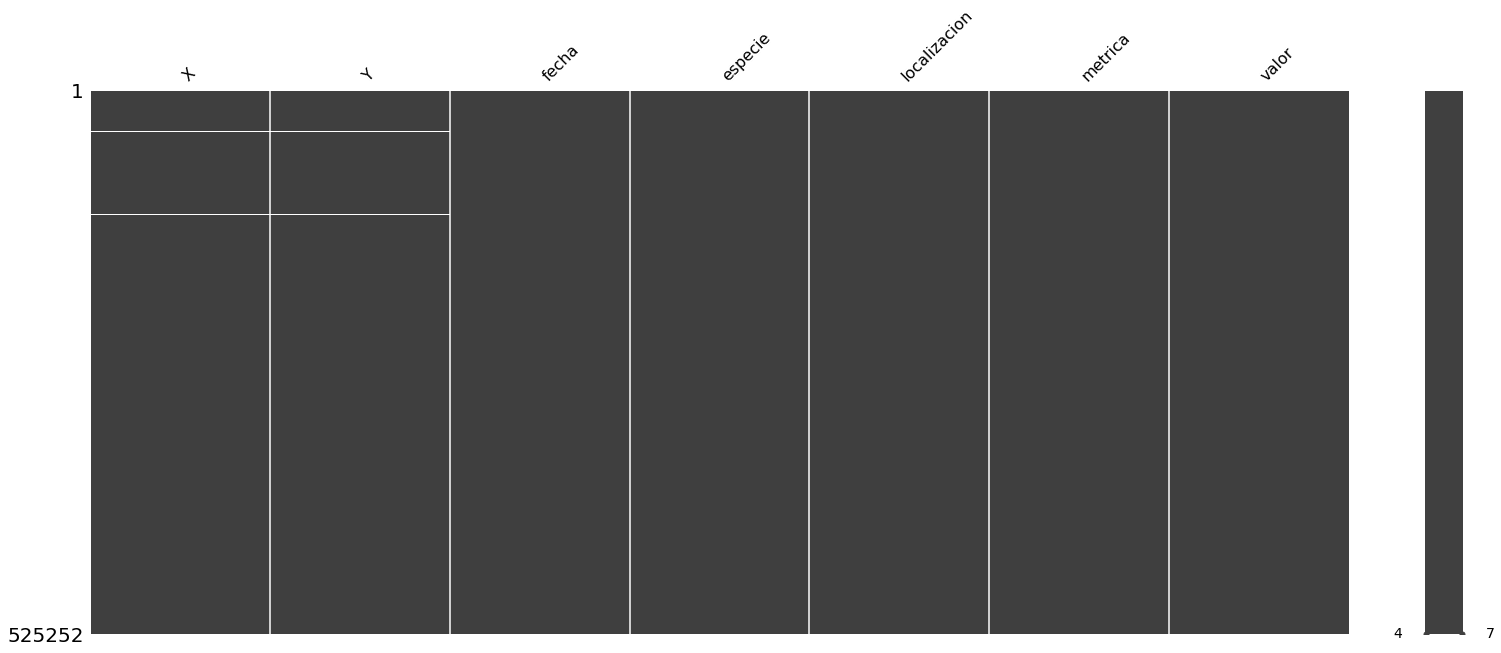

In [14]:
_ = msno.matrix(df)

se remueven los valores faltantes

In [15]:
df.dropna(inplace = True)

## Removiendo outliers

Se removerán las mediciones negativas y mayores que 10,000

In [16]:
outliers_neg = df.valor < 0
outliers = df.valor > 10000
print(f'Núm. de outliers negativos: {outliers_neg.sum()} ({outliers_neg.sum()*100/len(df)} %)')
print(f'Núm. de outliers mayores que 10,000: {outliers.sum()} ({outliers.sum()*100/len(df)} %)')

df = df[~outliers_neg & ~outliers]
df

Núm. de outliers negativos: 17 (0.0032484407484407486 %)
Núm. de outliers mayores que 10,000: 0 (0.0 %)


,X,Y,fecha,especie,localizacion,metrica,valor
0,675656.592,3265733.258,2000-02-18,PASTIZAL,DENTRO,EVI,1283.0
1,675876.873,3265733.258,2000-02-18,PASTIZAL,DENTRO,EVI,1414.0
2,676978.274,3262869.614,2000-02-18,PASTIZAL,DENTRO,EVI,1383.0
3,676978.274,3262649.334,2000-02-18,PASTIZAL,DENTRO,EVI,1575.0
4,676537.714,3261988.493,2000-02-18,PASTIZAL,DENTRO,EVI,1446.0
...,...,...,...,...,...,...,...
525247,693696.707,3233124.267,2021-01-01,MEZQUITAL,FUERA,NDVI,2938.0
525248,694798.124,3232463.417,2021-01-01,MEZQUITAL,FUERA,NDVI,2762.0
525249,695899.540,3232463.417,2021-01-01,MEZQUITAL,FUERA,NDVI,2716.0
525250,695018.407,3231141.717,2021-01-01,MEZQUITAL,FUERA,NDVI,3088.0


se guarda el archivo

In [17]:
df.to_csv('datos_unificado.csv', index = False)
# Se comprime el archivo
with ZipFile('datos_unificado.zip', 'w') as zip:
    zip.write('datos_unificado.csv', compress_type = zipfile.ZIP_DEFLATED)
    os.remove('datos_unificado.csv')
print('Se exportó el archivo')

Se exportó el archivo
